In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as sdm

In [61]:
def check(image, y, x):
    if not 0 <= x < image.shape[1]:
        return False
    if not 0 <= y < image.shape[0]:
        return False
    if image[y,x] !=0:
        return True
    return False

def neighbours2(image,y,x):
    left = y, x-1
    top = y-1,x

    if not check(image, *left):
        left = None
    if not check(image, *top):
        top = None

    return left,top

def find(label,linked):
    j = int(label)
    while linked[j] != 0:
        j = linked[j]
    return j

def union(label1,label2,linked):
    j = find(label1,linked)
    k = find(label2,linked)
    if j != k:
        linked[k] = j
    


def two_pass_labeling(b_image):
    labeled = np.zeros_like(b_image)
    label = 1
    linked = np.zeros(len(b_image)+1000, dtype='uint')

    for y in range(b_image.shape[0]):
        for x in range(b_image.shape[1]):
            if b_image[y,x] != 0:
                ns = neighbours2(b_image,y,x)
                if ns[0] is None and ns[1] is None:
                    m = label
                    label += 1
                else:
                    lbs = [labeled[i] for i in ns if i is not None]
                    m = min(lbs)
                labeled[y,x] = m

                for n in ns:
                    if n is not None:
                        lb = labeled[n]
                        if lb != m:
                            union(m, lb, linked)


    labs = []
    
    for y in range(b_image.shape[0]):
        for x in range(b_image.shape[1]):
            if b_image[y,x] != 0:
                new_label = find(labeled[y,x],linked)
                
                if new_label != labeled[y,x]:
                    labeled[y,x] = new_label                    
                if new_label not in labs:
                    labs.append(new_label)
                if labeled[y,x] in labs:
                    labeled[y,x] = labs.index(new_label) + 1

    return labeled


In [62]:
path = '../data/wires/'

In [63]:
wire1 = np.load(path + 'wires1.npy').astype('uint')
wire2 = np.load(path + 'wires2.npy').astype('uint')
wire3 = np.load(path + 'wires3.npy').astype('uint')
wire4 = np.load(path + 'wires4.npy').astype('uint')
wire5 = np.load(path + 'wires5.npy').astype('uint')
wire6 = np.load(path + 'wires6.npy').astype('uint')

In [64]:
kernel = np.array([[0, 1, 0],
                   [0, 1, 0], 
                   [0, 1, 0]])

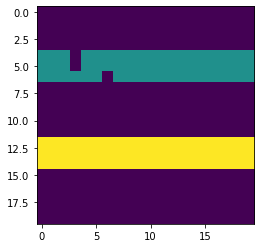

In [72]:
wire = wire4.copy()

marked_wire = two_pass_labeling(wire)
plt.imshow(marked_wire)
wires = marked_wire.max()

wires_arr = np.array([np.zeros_like(marked_wire) for i in range(wires)])

for i in range(wires):
    pos = np.where(marked_wire == i+1)
    wires_arr[i][pos] = 1



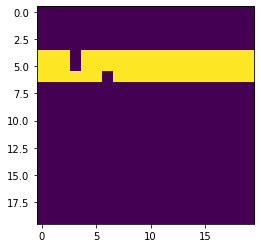

In [73]:
plt.imshow(wires_arr[0])

In [75]:
for i in range(wires):
    splited_wire = sdm.binary_opening(wires_arr[i], kernel).astype('uint')
    splited_wire = two_pass_labeling(splited_wire)
#     print(splited_wire)
    cur_wires = splited_wire.max()
    if cur_wires == 0:
        print(f'wire {i} no wires, in fact')
    else:
        print(f'wire {i} has {int(cur_wires - 1)} splits')

wire 0 has 2 splits
wire 1 has 0 splits
